In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dwave_networkx as dnx

In [1]:
import networkx as nx
from tqdm import trange
from fairness_goodness_computation import *
import csv 

Data = open('soc-sign-bitcoinotc.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('Weight', int),('Timestamp', int)))

# Setting weights -1 to 1
weights = nx.get_edge_attributes(G,"Weight")
for key, val in weights.items():
    weights[key] = val/10
nx.set_edge_attributes(G, weights, "Weight")

In [2]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 5881
Number of edges: 35592
Average in degree:   6.0520
Average out degree:   6.0520


In [167]:
[len(c) for c in sorted(nx.connected_components(G.to_undirected()), key=len, reverse=True)]

[5875, 2, 2, 2]

In [433]:
nodes = []
WW = nx.get_edge_attributes(G,"Weight")
count = 0
for i in (G.edges):
    if(WW[i] < 0):
        nodes.append(i[0])
        nodes.append(i[1])
        count+=2
    if(count == 40):
        break    

In [434]:
H = G.to_undirected().subgraph(nodes)
nx.info(H)

'Name: \nType: Graph\nNumber of nodes: 20\nNumber of edges: 43\nAverage degree:   4.3000'

In [435]:
np.unique((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int), return_counts = 1)

(array([0, 1]), array([17, 26], dtype=int64))

In [436]:
A = nx.adjacency_matrix(H, weight = "Weight")

In [437]:
print('Adjacency matrix:')
A.todense()

Adjacency matrix:


matrix([[ 0. ,  0.8,  0.1,  1. ,  0.8,  0.4,  0.8, -0.5, -1. ,  0. ,
         -1. ,  0. , -0.5,  0. ,  0. ,  0. ,  0.2,  0.9, -1. ,  0.2],
        [ 0.8,  0. ,  0. ,  0.6,  0.5,  0. ,  0.2,  0. ,  0. ,  0. ,
          0. ,  0. ,  0.8,  0.3,  0. , -0.1,  0. ,  0. ,  0. ,  0. ],
        [ 0.1,  0. ,  0. ,  0. ,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.1],
        [ 1. ,  0.6,  0. ,  0. ,  0.5,  0. ,  0.8,  0. ,  0. ,  0.1,
          0. ,  0. ,  0.7, -1. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.8,  0.5,  0. ,  0.5,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,
          0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ],
        [ 0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,
         -1. ,  0. ,  0. , -1. ,  0. ,  0. , -1. ,  0.5,  0. ,  0.1],
        [ 0.8,  0.2, -0.1,  0.8, -0.1,  0.5,  0. ,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ,  0.1,  0. ,  0. , -0.5,  0. ,  0. ,  0.1],
        [-0.5,  0. ,  0. , 

In [438]:
D = np.diag(np.sum(np.abs(np.array(A.todense())), axis=1))
print('Degree matrix:')
print(D)

Degree matrix:
[[9.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  3.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  5.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  3.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  4.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  3.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. 

In [439]:
L = D - A
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = np.dot(D_inv_sqrt, L).dot(D_inv_sqrt)
L

matrix([[ 1.        , -0.1451908 , -0.06019293, -0.13809204, -0.13355611,
         -0.06216699, -0.14744196,  0.2331262 ,  0.31434731,  0.        ,
          0.2331262 ,  0.        ,  0.10425721,  0.        ,  0.        ,
          0.        , -0.05057217, -0.19153272,  0.31434731, -0.08512565],
        [-0.1451908 ,  1.        ,  0.        , -0.13834289, -0.13937367,
          0.        , -0.06154575,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        , -0.27852425, -0.10660036,  0.        ,
          0.06579517,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.06019293,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.10206207,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.23570226],
        [-0.13809204, -0.13834289,  0.        ,  1.        , -0.10604746,
          0.        , -0.18731716, 

In [450]:
k = 3

In [451]:
e, v = np.linalg.eig(L)
mapp = dict(zip(e,v))
minns = sorted(e[e > 0])[:k]
SMALLEST = [mapp[l].T for l in minns]
U = np.real(np.array(SMALLEST).reshape(k,len(H.nodes)).T)

In [452]:
from sklearn.cluster import SpectralClustering, KMeans
print(U.shape)
km = KMeans(n_clusters=k)
km.fit(U)
km.labels_

(20, 3)


array([0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

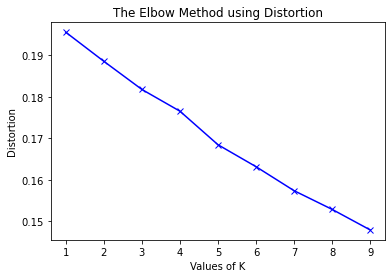

In [399]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k, init='k-means++').fit(U)
	kmeanModel.fit(U)

	distortions.append(sum(np.min(cdist(U, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / U.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(U, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / U.shape[0]
	mapping2[k] = kmeanModel.inertia_
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

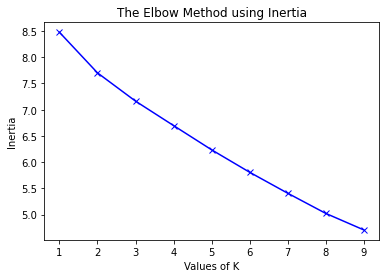

In [400]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [453]:
from collections import defaultdict
dic = defaultdict(list)
for i in range(len(list(H.nodes))):
    dic[km.labels_[i]].append(list(H.nodes)[i])

In [454]:
# import numpy as np
# pos = nx.circular_layout(H)
# r = 7
# radii = list(range(r*1, r*len(dic.keys()) + r, r))

# for ea in pos.keys():
#     new_r = 1
#     for i in range(len(dic.keys())):
#         if(ea in dic[i]):
#             new_r = radii[i]
#     pos[ea] *= new_r

In [455]:
[len(dic[i]) for i in dic.keys()]

[4, 2, 14]

In [456]:
colos = list((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int))

In [457]:
# --- Begin_myhack ---
# All this code should replace original `pos=nx.spring_layout(graph)`
import numpy as np
pos = nx.circular_layout(H)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in dic.keys():
        if(ea in dic[i]):
            posx = i
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# --- End_myhack ---

{1: Text(-0.7500000191730894, 3.0310889325178354, '0'),
 2: Text(-0.7989434782174792, -2.7220718973461535, '1'),
 1281: Text(4.309016987090141, 0.5877852519323625, '2'),
 4: Text(-1.1622147672407261, 3.8401059195087672, '0'),
 6: Text(-1.4409830330760298, 3.9821454542011483, '0'),
 905: Text(3.4999999563878217, 0.9999999999999991, '2'),
 13: Text(-2.0590170263301957, -2.0800324318945655, '1'),
 672: Text(2.912214827043789, 0.8090170062632307, '2'),
 2471: Text(-2.5590170464963653, 3.6188741055732554, '0'),
 423: Text(2.54894353802054, 0.3090170457017024, '2'),
 2096: Text(2.500000019371509, -6.815047609479076e-08, '2'),
 1331: Text(2.548943478415896, -0.3090169475524611, '2'),
 62: Text(2.690983072712921, -0.5877853325970523, '2'),
 832: Text(2.9122149462530764, -0.8090170869279205, '2'),
 713: Text(3.190982914065162, -0.9510564428063707, '2'),
 204: Text(3.5000000120240897, -0.9999999614554016, '2'),
 1753: Text(3.8090171159355783, -0.9510564428063707, '2'),
 1383: Text(4.087785053945

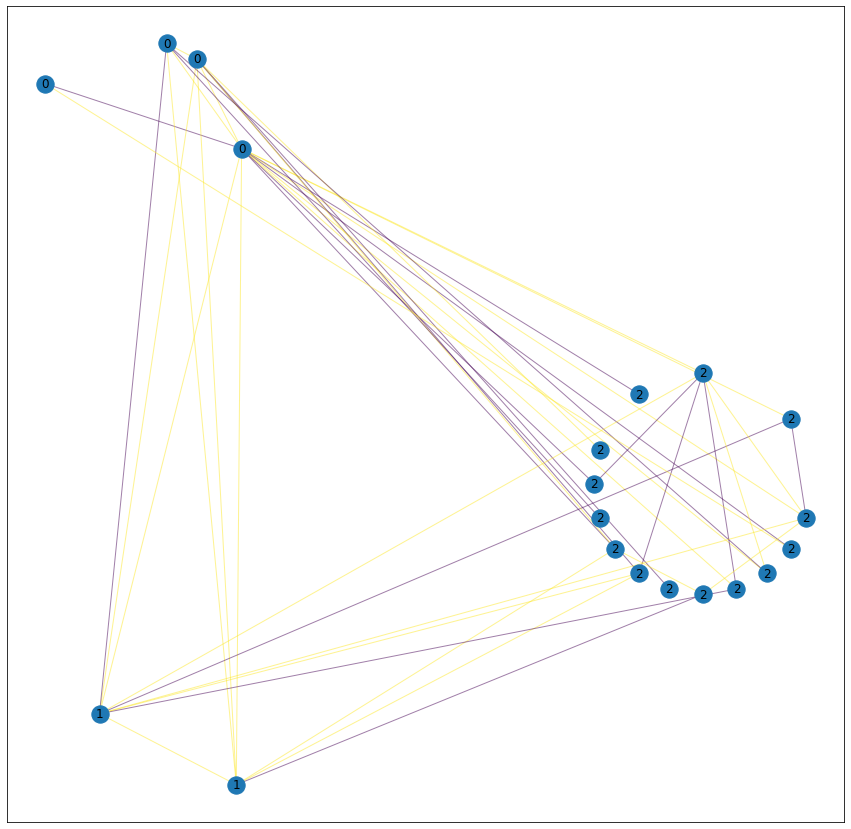

In [458]:
plt.figure(figsize = (15,15))
# plt.xlim(-(r*len(dic.keys()) + r),r*len(dic.keys()) + r + 10)
# plt.ylim(-(r*len(dic.keys()) + r),r*len(dic.keys()) + r + 10)
nx.draw_networkx_nodes(H, pos = pos)
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos)# edge_cmap = plt.cm.RdBu
nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), km.labels_)), pos = pos)

### STRUCTURAL IMBALANCE!

In [368]:
import dimod
WW = nx.get_edge_attributes(H,"Weight")
nx.set_edge_attributes(H, WW, "sign")
sampler = dimod.RandomSampler()
f, c = dnx.structural_imbalance(H, sampler)

In [369]:
dic = defaultdict(list)
for i in list(H.nodes):
    dic[c[i]].append(i)

In [370]:
# --- Begin_myhack ---
# All this code should replace original `pos=nx.spring_layout(graph)`
import numpy as np
pos = nx.circular_layout(H)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in range(len(dic.keys())):
        if(ea in dic[i]):
            posx = i
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# --- End_myhack ---

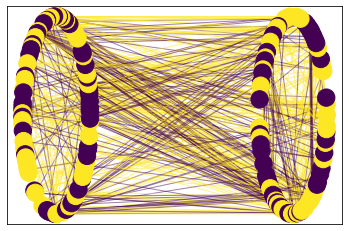

In [371]:
nx.draw_networkx_nodes(H, pos = pos, node_color = list(c.values()))
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos) # , edge_cmap = plt.cm.RdBu
# nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), km.labels_)), pos = pos)